Consider a radioactive decay problem involving two types of nuclei, $A$ and $B$, with populations $N_{A}(t)$ and $N_{B}(t)$. Suppose that type $A$ nuclei decay to form type $B$ nuclei, wich then also decay, according to the differential equations

$\frac{dN_A}{dt} = - \frac{N_{A}}{\tau_{A}}$

$\frac{dN_{B}}{dt} = \frac{N_{A}}{\tau_{A}} - \frac{N_B}{\tau_{B}}$

where $\tau_A$ and $\tau_B$ are the decay time constants for each type of nucleus. Use the Euer method to solve these coupled equations for $N_{A}$ and $N_{B}$ as functions of time. This problem can also be solved exaclty, as was the case with our original nuclear decay problem. Obtain the analytic solutions for $N_{A}(t)$ and $N_{B}(t)$, and compare them with your numerical results. It is also interesting to explore the behavior found for different values of the ratio $\frac{\tau_A}{\tau_{B}}$. In particular, try to interpret the short and long time begaviors for different values of this ratio.

The Euler method is a first-order numerical method to solve EDO

$y'(t) = f(t,y(t)), \quad y(t_0) = y_0$

$y_{n+1} = y_n + hf(t_n,y_n)$

for our case, we will have two equations:

$N_{A}^{n+1}  = N_{A}^{n} -  \frac{N_{A}^{n}}{\tau_A} \Delta t$

$N_{B}^{n+1}  = N_{B}^{n} + \left(\frac{N_{A}^{n}}{\tau_A} - \frac{N_{B}^{n}}{\tau_B} \right)\Delta t$

In [1]:
import numpy as np #mathical package
import matplotlib.pyplot as plt #package to create figures

In [1]:
#Solves the Euler method to this problem
def N_E(t,Na0,Nb0,tau_a,tau_b):
    i=0
    Na=np.zeros(len(t))
    Nb=np.zeros(len(t))
    Na[0]=Na0
    Nb[0]=Nb0
    while i<len(t)-1:
        dt= t[i+1]-t[i]
        Na[i+1]= Na[i] - Na[i]*dt/tau_a
        Nb[i+1]= Nb[i] + dt*(Na[i]/tau_a - Nb[i]/tau_b )
        i+=1
    return(Na,Nb)

<function matplotlib.pyplot.show(close=None, block=None)>

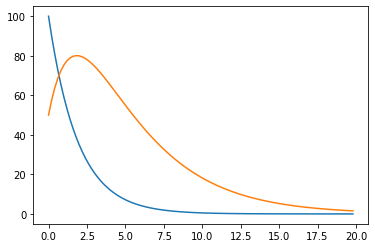

In [62]:
Na0 = 100 #Number of A nuclei
t_a = 2   #Decay time of A nuclei

Nb0  = 50 #Number of b nuclei
t_b = 4 #Decay time of B nuclei


t = np.arange(0,20,0.2) #Creates the time interval
Na,Nb = N_E(t,Na0,Nb0,t_a,t_b)
plt.plot(t,Na,t,Nb)
plt.show

To solve analytically the diferential equation, firstly we solve the $N_A$ that does not depends of $N_B$

$\frac{dN_A}{dt} = - \frac{N_{A}}{\tau_{A}}$


$\rightarrow N_A = N_{A0} \; \;e^{-\frac{t}{\tau_A}} $

The $N_B$ part:

$\frac{dN_{B}}{dt} = \frac{N_{A0} \; \;e^{-\frac{t}{\tau_A}}}{\tau_{A}} - \frac{N_B}{\tau_{B}}$

$\rightarrow N_{B} = \left(N_{B0} - N_{A0}\frac{\tau_b}{\tau_a-\tau_b}\right)e^{-\frac{t}{\tau_B}} + N_{A0}\frac{\tau_b}{\tau_a-\tau_b}e^{-\frac{t}{\tau_B}}$

In [55]:
def N_f(t,Na0,Nb0,tau_a,tau_b):
    Na= Na0*np.exp(-t/tau_a)
    c= Nb0 - Na0*tau_b/(tau_a-tau_b)
    Nb= c*np.exp(-t/tau_b) + Na0*tau_b/(tau_a-tau_b)*np.exp(-t/tau_a)
    return(Na,Nb)

<function matplotlib.pyplot.show(close=None, block=None)>

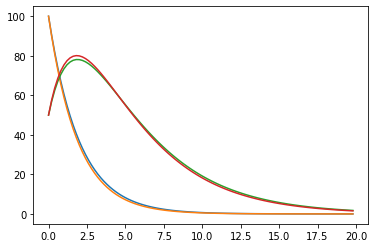

In [65]:
Na2,Nb2 = N_f(t,Na0,Nb0,t_a,t_b)
plt.plot(t,Na2,t,Na)
plt.plot(t,Nb2,t,Nb)
plt.show

Is evident that the two solutions are very close, and tend to  